In [38]:
# Load libraries

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()    # targets are of type string

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

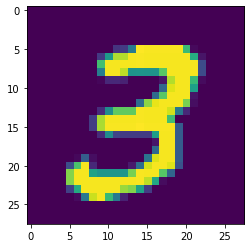

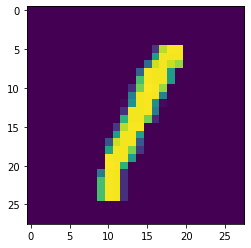

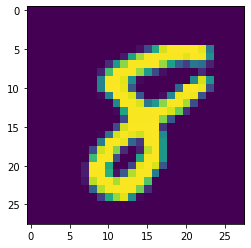

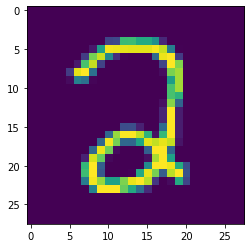

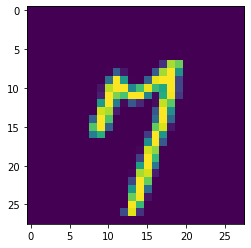

In [50]:
# Extracting data and target variables
data, targets = mnist["data"], mnist["target"]   # data_shape : (70000, 784) & targets_shape :(70000,) 

# 5 examples from the mnist dataset

#targets[7]        # "3"
#targets [77]      # "1"
#targets [777]     # "8"
#targets[7776]     # "2"
#targets [6777]    # "7"

digits=[7,77,777,7776,6777]

for i in range(5):
    
  digit=data[digits[i]].reshape(28, 28)
  plt.imshow(digit)
  plt.show()




In [4]:
# Split the dataset into training and testing sets
data_train, data_test, targets_train, targets_test = train_test_split(data, targets, test_size=0.2, random_state=1) 


In [5]:
# Target vectors for the classification
targets_train_3 = (targets_train == "3")   # array of booleans  shape :(56000,)
targets_test_3 = (targets_test == "3")      # array of booleans shape :(14000,)


In [6]:
# Fitting the classifier
clf = SGDClassifier(random_state=1)
clf.fit(data_train, targets_train_3)

SGDClassifier(random_state=1)

In [59]:
# Testing the classifier

clf.predict(data_test)

print("index zero :" ,targets_test[0], "  index 1 :",targets_test[1],"  last index :",targets_test[13999])

index zero : 6   index 1 : 2   last index : 1


In [67]:
targets_train_pred = cross_val_predict(clf, data_train, targets_train_3, cv=3)
conf_matrix=confusion_matrix(targets_train_3, targets_train_pred)

In [68]:
# Multiclass classification(classify the 10 digits)
clf.fit(data_train, targets_train)
clf.predict(data_test)


array(['6', '2', '3', ..., '4', '3', '1'], dtype='<U1')

index zero : AxesImage(54,36;334.8x217.44)


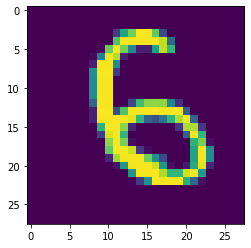

In [77]:
print("index zero :" ,plt.imshow(data_test[0].reshape(28,28),))

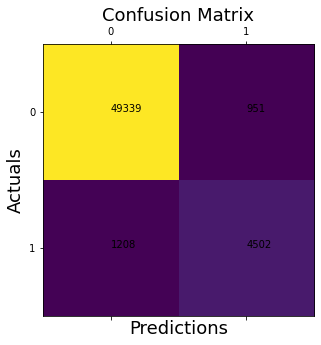

In [78]:
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [85]:
TN=conf_matrix[0][0]  # 49339
FP=conf_matrix[0][1]  # 951
FN=conf_matrix[1][0]  # 1208
TP=conf_matrix[1][1]  # 4502